In [649]:
#import all the required libraries
import pandas as pd
import selenium
from selenium import webdriver
import requests
from bs4 import BeautifulSoup
import time
import urllib.request
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

# Q1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

# Q2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a dataframe and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [233]:
product=input("Enter the product:") #Enter the product

driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url = "https://www.amazon.in"
driver.get(url)

#Finding element for job search
search_job=driver.find_element_by_id('twotabsearchtextbox')

#Write on search bar
search_job.send_keys(product)
search_button = driver.find_element_by_xpath('//span[@id="nav-search-submit-text"]') # Locating search_button by xpath
search_button.click()

Enter the product:laptop


In [234]:
name=[]
#Scrapping Titles
titles=driver.find_elements_by_xpath("//span[@class='a-size-medium a-color-base a-text-normal']")
for i in titles:
    name.append(i.text)
len(name)

23

In [236]:
price=[]
prices=driver.find_elements_by_class_name('a-price')
for i in prices:
    price.append(i.text)
len(price)

43

In [ ]:
//*[@id="search"]/div[1]/div/div[1]/div/span[3]/div[2]/div[6]/div/span/div/div/div[2]/div[2]/div/div/div[3]/div[1]/div/div[2]/div[2]/span

In [241]:
#locating Ratings
Ratings=[]
urls=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")#collecting urls of all the laptop
UR=[]
for i in urls:
    UR.append(i.get_attribute('href'))#getting the url of first 10 laptops
for url in UR:#loop for every laptop in the list
    driver.get(url)
    try:                  #exception handling for nosuchelementexception             
        rating=driver.find_element_by_xpath("//span[@class='a-size-base a-nowrap']//span")#locating the rating
        Ratings.append(rating.text)#appending the ratings in Ratings list
        
    except NoSuchElementException:
        Ratings.append("NO rating")#appending the No rating if no rating is there
Ratings  

['NO rating',
 '3.7 out of 5',
 '2.8 out of 5',
 '4 out of 5',
 '3.6 out of 5',
 '3.9 out of 5',
 '3.5 out of 5',
 '3.9 out of 5',
 '3.7 out of 5',
 '3.9 out of 5',
 '4.3 out of 5',
 '3.8 out of 5',
 '4.5 out of 5',
 '4.4 out of 5',
 'NO rating',
 '3.2 out of 5',
 '3.5 out of 5',
 '3.3 out of 5',
 '4.4 out of 5',
 '4.3 out of 5',
 '5 out of 5',
 '4.3 out of 5',
 '5 out of 5']

In [243]:
#creating a dataframe
df=pd.DataFrame({'Product Name':name,
                'Price':price[0:23],
                'Ratings':Ratings})
#printing dataframe
df

,Product Name,Price,Ratings
0,Lenovo IdeaPad Slim 3 (2021) | Intel Core i3 1...,"₹43,955",NO rating
1,"HP 15 (2021) Thin & Light Ryzen 3-3250 Laptop,...","₹57,290",3.7 out of 5
2,"Lenovo Ideapad Slim 3 15.6"" HD Thin and Light ...","₹36,490",2.8 out of 5
3,"ASUS VivoBook 15 (2020), 39.6 cm HD, Dual Core...","₹39,788",4 out of 5
4,HP 15 Entry Level 15.6-inch (39.62 cms) HD Lap...,"₹28,298",3.6 out of 5
5,"Lenovo Yoga 6 AMD Ryzen 7 4700U 13.3"" (33.78 c...","₹30,990",3.9 out of 5
6,HP 15 Intel Pentium Gold 6405U Processor Entry...,"₹25,990",3.5 out of 5
7,AVITA Essential Refresh NE14A2INC43A-MB 14-inc...,"₹29,632.50",3.9 out of 5
8,Acer Extensa 15 Thin & Light Laptop Intel Proc...,"₹78,990",3.7 out of 5
9,RDP ThinBook 1010 - Intel Celeron Quad Core Pr...,"₹1,21,690",3.9 out of 5


# Q3.Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

In [273]:
#product=input("Enter the product:") #Enter the product
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url ="https://images.google.com/"
driver.get(url)

#Finding element for  search
search_keyword=driver.find_element_by_xpath('//*[@id="sbtc"]/div/div[2]/input')

#Write on search bar
search_keyword.send_keys("fruits")
search_button = driver.find_element_by_class_name('Tg7LZd') # Locating search_button by xpath
search_button.click()

In [ ]:
ref=driver.find_elements_by_tag_name('img')
for i in ref:
    response= requests.get(ref[i])

    file = open("G:\Data-Trained\Internship- Flip Robo\Assignment\Selenium\Train image"+str(i)+".jpg", "wb")

    file.write(response.content)
    
    













https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5OfsQIAz-rWSeeiPLGfaZaZyNZk6dMnHA2iAuYoSRj6XfvdWr&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMAA3tbe_k0WQMd64nYIMX4xUYQA-otx5qGLUGxB-9A9ydMHnG&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTS8xKHWZlAgS9ml3GRLXERz8slD4D3_t2S0yggfPUfwwRZuQkJ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiQWvlM3b7I8AjofnDSF5pAuQNp9QzwELBBAaO4aLUdiFy0b9_&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRccqapL1cXwX6u7zzZ_IMesQN8h1vMCQZhH8RTVHCufwDhYElv&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGvFKPi9GEk_xg67vGEen74od61VAlS--rSLt6qssjeOL0n_HI&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTc1nluyOn4L3w-mviiJHbbs20Eilv4Ew10h2heQnVsXHJbXBbO&usqp=CAU

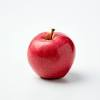
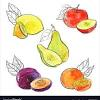
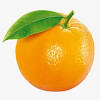
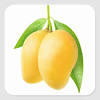
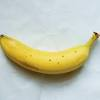
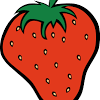
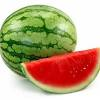
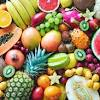
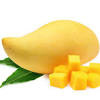
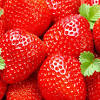
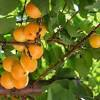
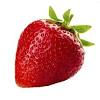

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDonZ66WU2dsZaHC2P2hvCIK6Xr2cKZIORKlHZhcE&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXA-psZkvScT89rbXFQPcj7Aps3YkYVDKFqa4I_J6I2TK9UyF2&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3__VHWdKRm_SaMsOv1XuRZASdcy7sx3bp9afU9pw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdShfMkIhGk4vxNrpvj5fsqUC-uVb-AzaGIn-5lOFmsQaqS3F-&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROaDFE5dqfZu4T3XHcb2TUqr9zXN8nlgiIPpRCVq-B0_7z6bL7&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0inh-T8mRePB9qzqe3cbHAycaVamWoMAjrVD4ApK2v6zNfFkE&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRREdxzW_CttXLPV7qKUptwl8B8vR87J9P36OaHMGQruXLoGept&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRopFWUUrZbXq8Z3KT_l6UnH-D5wFMMhYA1xC2EcxOFnGoIOuuz&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRy9-WjCCB2LThHoXZ5KCXKL6HXd8uBbuml6b31lqPxq57Ns8Hw&u
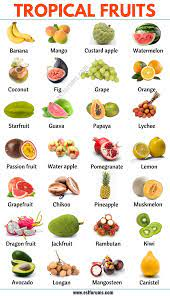
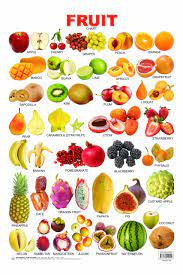
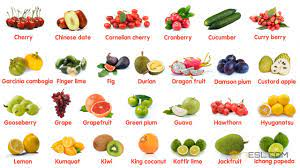
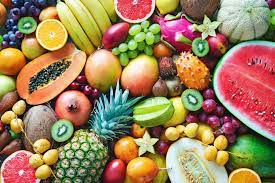
















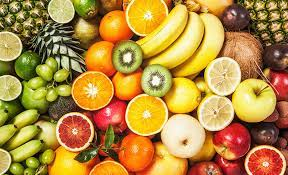
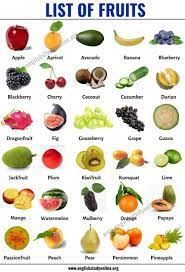
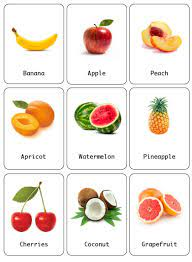
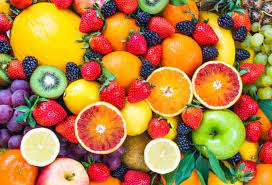
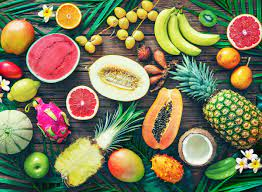
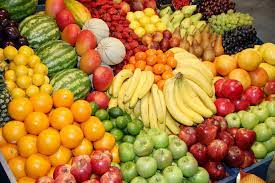
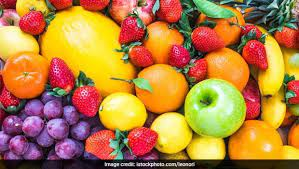
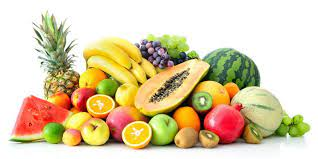
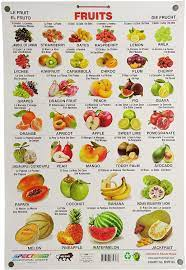
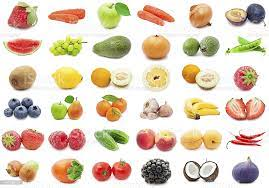
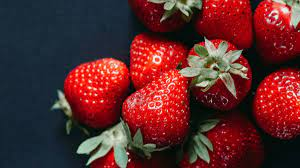
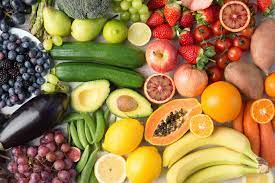
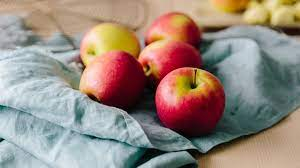
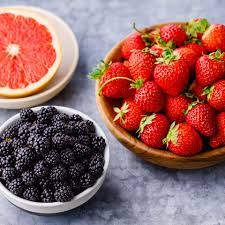



https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTo4_shfG85msF591Y45W4T800Efmd5L8ksvg&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScNsyItlDyI1EElKhTmRzYCioXSNaDvYNztw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQc65bNSDE9i7baVuF9ftpQkabn68R7FKCJyw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSsZyKU4pEUcVP2x_GtXrgZ8kRbLhim4vwD5Q&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRp9jct7U3cTh2ya3NJC_BCODMlSuiobeiqw0Gz2Wu_FFg-5wnQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJxZccmnVQaza0MMSsYOJvLx5GYWJqEpyJm_oprqL-K8XJTFeB&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQbNwBpp3pVNOnyjfxOrNrRdxXK-dgFswrOQWmcnY0fZeBMZm8g&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQCOVVYHwTsUQcY7dnyC3GgppF8lmLOAxaQzQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQA6yOWfPWP2ncAFz-eKvuGPQB4KfbpqzT5vA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQi
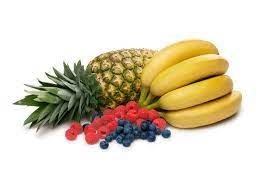
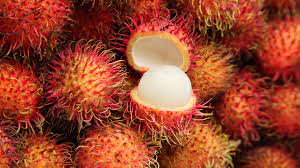

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMvZV81aVdJAGJOeAQlc9KbgUEGvfQzxO8TQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7kkivkhNYl7J-zrplcR4yzU2SWnbokp6Gxg&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTls-whrQZSb3M438SoCy-p-WTKgy85phUKjA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRAFt0xHiff3fl4uAzBm9kkAa36Rnq2-i1lHQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJGFCOcZwhRYqGOJlL4jdcaoyPabUO8Zu8pg&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQVEttZoEZw0MRpJ-uDyr6QiqzbIJyRR7ofNA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTw7tduEVdgN0Ato2FVDtEMNM4gMyTOdtPSUw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT4fqXfgTypAMphAwIjfmK5Gvzfzj-5KQVKRA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSYFPmypiw7PW8VNKtTiazr80huza3qbKpa6w&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1JSmIYF-TkPRBneyyjRpLtKe8n3IDCN_RCg&usqp=CAU


In [272]:
images = driver.find_elements_by_tag_name('img')
for image in images:
    print(image.get_attribute('src'))
driver.close()

In [ ]:
urllib.urlretrieve(src,"filename.png")

# Q4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. In case if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [274]:
#product=input("Enter the product:") #Enter the product
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url ="https://www.flipkart.com/"
driver.get(url)

In [276]:
#Type "Smartphone in search bar"
search=driver.find_element_by_xpath("/html/body/div/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input")
#Write on search bar
search.send_keys('Smartphone')

#Click on button
search_btn=driver.find_element_by_xpath("/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button")
search_btn.click()

In [277]:
#Extract all the brand
brand=[]
titles_tag=driver.find_elements_by_xpath("//div[@class='_4rR01T']")
for i in titles_tag:
    brand.append(i.text)
print(brand)
len(brand)

['realme C21 (Cross Black, 64 GB)', 'realme C21 (Cross Blue, 64 GB)', 'realme C21 (Cross Blue, 32 GB)', 'realme C21 (Cross Black, 32 GB)', 'POCO M3 (Cool Blue, 64 GB)', 'Infinix Hot 10 Play (Aegean Blue, 64 GB)', 'REDMI Note 9 (Pebble Grey, 64 GB)', 'REDMI 9i (Midnight Black, 64 GB)', 'realme C20 (Cool Grey, 32 GB)', 'realme C20 (Cool Blue, 32 GB)', 'POCO M3 (Cool Blue, 128 GB)', 'POCO M3 (Power Black, 64 GB)', 'REDMI Note 9 (Shadow Black, 64 GB)', 'REDMI 9i (Nature Green, 64 GB)', 'MOTOROLA E7 Power (Tahiti Blue, 32 GB)', 'realme Narzo 30A (Laser Black, 32 GB)', 'realme Narzo 30A (Laser Black, 64 GB)', 'realme Narzo 30A (Laser Blue, 64 GB)', 'realme Narzo 30A (Laser Blue, 32 GB)', 'REDMI 9i (Sea Blue, 64 GB)', 'POCO M3 (Yellow, 64 GB)', 'POCO M3 (Power Black, 128 GB)', 'POCO C3 (Matte Black, 32 GB)', 'realme Narzo 30 5G (Racing Silver, 128 GB)']


24

In [278]:
#Extract all the price
price=[]
titles_tag=driver.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")
for i in titles_tag:
    price.append(i.text)
print(price)
len(price)

['₹8,999', '₹8,999', '₹7,999', '₹7,999', '₹10,999', '₹8,499', '₹10,999', '₹8,299', '₹6,999', '₹6,999', '₹11,999', '₹10,999', '₹10,999', '₹8,299', '₹6,999', '₹8,999', '₹9,999', '₹9,999', '₹8,999', '₹8,299', '₹10,999', '₹11,999', '₹7,499', '₹15,999']


24

In [285]:
#Extract 
memory=[]
titles_tag=driver.find_elements_by_xpath("//li[@class='rgWa7D']")
for i in titles_tag:
    memory.append(i.text)
print(memory)
len(memory)

['4 GB RAM | 64 GB ROM | Expandable Upto 256 GB', '16.51 cm (6.5 inch) HD+ Display', '13MP + 2MP + 2MP | 5MP Front Camera', '5000 mAh Battery', 'MediaTek Helio G35 Processor', '1 Year Warranty for Mobile and 6 Months for Accessories', '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB', '16.51 cm (6.5 inch) HD+ Display', '13MP + 2MP + 2MP | 5MP Front Camera', '5000 mAh Battery', 'MediaTek Helio G35 Processor', '1 Year Warranty for Mobile and 6 Months for Accessories', '3 GB RAM | 32 GB ROM | Expandable Upto 256 GB', '16.51 cm (6.5 inch) HD+ Display', '13MP + 2MP + 2MP | 5MP Front Camera', '5000 mAh Battery', 'MediaTek Helio G35 Processor', '1 Year Warranty for Mobile and 6 Months for Accessories', '3 GB RAM | 32 GB ROM | Expandable Upto 256 GB', '16.51 cm (6.5 inch) HD+ Display', '13MP + 2MP + 2MP | 5MP Front Camera', '5000 mAh Battery', 'MediaTek Helio G35 Processor', '1 Year Warranty for Mobile and 6 Months for Accessories', '6 GB RAM | 64 GB ROM | Expandable Upto 512 GB', '16.59 cm (6.5

144

In [283]:
memory[0].split("|")[1]

' 64 GB ROM '

In [300]:
#Extracting ROM & RAM
mem=memory[0:144:6]
mem

['4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '3 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '3 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '6 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '2 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '2 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '6 GB RAM | 128 GB ROM | Expandable Upto 512 GB',
 '6 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '2 GB RAM | 32 GB ROM | Expandable Upto 1 TB',
 '3 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '3 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 

In [303]:
a=[]
for i in range(0,24):
    a.append(mem[i].split("|"))
a

[['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 256 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 256 GB'],
 ['3 GB RAM ', ' 32 GB ROM ', ' Expandable Upto 256 GB'],
 ['3 GB RAM ', ' 32 GB ROM ', ' Expandable Upto 256 GB'],
 ['6 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 256 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['2 GB RAM ', ' 32 GB ROM ', ' Expandable Upto 256 GB'],
 ['2 GB RAM ', ' 32 GB ROM ', ' Expandable Upto 256 GB'],
 ['6 GB RAM ', ' 128 GB ROM ', ' Expandable Upto 512 GB'],
 ['6 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['2 GB RAM ', ' 32 GB ROM ', ' Expandable Upto 1 TB'],
 ['3 GB RAM ', ' 32 GB ROM ', ' Expandable Upto 256 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 256 GB'],
 ['4 GB RAM ', 

In [334]:
ram=[]
rom=[]
for i in range(0,24):
    ram.append(a[i][0])
    rom.append(a[i][0])
print(ram)
print(rom)

24
24


In [338]:
#Extract display size & display resolution
display=memory[1:144:6]
display

['16.51 cm (6.5 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '17.32 cm (6.82 inch) HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) HD+ Display',
 '16.54 cm (6.51 inch) HD+ Display',
 '16.54 cm (6.51 inch) HD+ Display',
 '16.54 cm (6.51 inch) HD+ Display',
 '16.54 cm (6.51 inch) HD+ Display',
 '16.54 cm (6.51 inch) HD+ Display',
 '16.59 cm (6.53 inch) HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) HD+ Display',
 '16.51 cm (6.5 inch) Full HD+ Display']

In [342]:
#Extract front & rear camera
q=memory[2:144:6]

In [349]:
z=[]
#Extract 
for i in range(0,24):
    z.append(q[i].split("|"))

In [348]:
front_cam=[]
rear_cam=[]
for i in range(0,24):
    front_cam.append(z[i][1])
    rear_cam.append(z[i][0])
print(front_cam)
print(rear_cam)

[' 5MP Front Camera', ' 5MP Front Camera', ' 5MP Front Camera', ' 5MP Front Camera', ' 8MP Front Camera', ' 8MP Front Camera', ' 13MP Front Camera', ' 5MP Front Camera', ' 5MP Front Camera', ' 5MP Front Camera', ' 8MP Front Camera', ' 8MP Front Camera', ' 13MP Front Camera', ' 5MP Front Camera', ' 5MP Front Camera', ' 8MP Front Camera', ' 8MP Front Camera', ' 8MP Front Camera', ' 8MP Front Camera', ' 5MP Front Camera', ' 8MP Front Camera', ' 8MP Front Camera', ' 5MP Front Camera', ' 16MP Front Camera']
['13MP + 2MP + 2MP ', '13MP + 2MP + 2MP ', '13MP + 2MP + 2MP ', '13MP + 2MP + 2MP ', '48MP + 2MP + 2MP ', '13MP + Depth Sensor ', '48MP + 8MP + 2MP + 2MP ', '13MP Rear Camera ', '8MP Rear Camera ', '8MP Rear Camera ', '48MP + 2MP + 2MP ', '48MP + 2MP + 2MP ', '48MP + 8MP + 2MP + 2MP ', '13MP Rear Camera ', '13MP + 2MP ', '13MP + 2MP ', '13MP + 2MP ', '13MP + 2MP ', '13MP + 2MP ', '13MP Rear Camera ', '48MP + 2MP + 2MP ', '48MP + 2MP + 2MP ', '13MP + 2MP + 2MP ', '48MP + 2MP + 2MP ']


In [352]:
#Extract battery capacity
battery=memory[3:144:6]

In [357]:
#Extract processor
processor=memory[4:144:6]

In [358]:
#Extract warranty
warranty=memory[5:144:6]

In [359]:
mob=pd.DataFrame()
mob["Product Name"]=brand
mob["Price"]=price
mob["ROM"]=rom
mob["RAM"]=ram
mob["Primary Camera"]=rear_cam
mob["Secondary Camera"]=front_cam
mob["Battery Capacity"]=battery
mob["Processor"]=processor
mob["Warranty"]=warranty
mob

,Product Name,Price,ROM,RAM,Primary Camera,Secondary Camera,Battery Capacity,Processor,Warranty
0,"realme C21 (Cross Black, 64 GB)","₹8,999",4 GB RAM,4 GB RAM,13MP + 2MP + 2MP,5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...
1,"realme C21 (Cross Blue, 64 GB)","₹8,999",4 GB RAM,4 GB RAM,13MP + 2MP + 2MP,5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...
2,"realme C21 (Cross Blue, 32 GB)","₹7,999",3 GB RAM,3 GB RAM,13MP + 2MP + 2MP,5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...
3,"realme C21 (Cross Black, 32 GB)","₹7,999",3 GB RAM,3 GB RAM,13MP + 2MP + 2MP,5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...
4,"POCO M3 (Cool Blue, 64 GB)","₹10,999",6 GB RAM,6 GB RAM,48MP + 2MP + 2MP,8MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor,"One Year Warranty for Handset, 6 Months for Ac..."
5,"Infinix Hot 10 Play (Aegean Blue, 64 GB)","₹8,499",4 GB RAM,4 GB RAM,13MP + Depth Sensor,8MP Front Camera,6000 mAh Li-ion Polymer Battery,MediaTek Helio G35 Processor,1 Year on Handset and 6 Months on Accessories
6,"REDMI Note 9 (Pebble Grey, 64 GB)","₹10,999",4 GB RAM,4 GB RAM,48MP + 8MP + 2MP + 2MP,13MP Front Camera,5020 mAh Battery,MediaTek Helio G85 Processor,1 Year Manufacturer Warranty for Device and 6 ...
7,"REDMI 9i (Midnight Black, 64 GB)","₹8,299",4 GB RAM,4 GB RAM,13MP Rear Camera,5MP Front Camera,5000 mAh Lithium Polymer Battery,MediaTek Helio G25 Processor,Brand Warranty of 1 Year Available for Mobile ...
8,"realme C20 (Cool Grey, 32 GB)","₹6,999",2 GB RAM,2 GB RAM,8MP Rear Camera,5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...
9,"realme C20 (Cool Blue, 32 GB)","₹6,999",2 GB RAM,2 GB RAM,8MP Rear Camera,5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...


# Q5.Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [420]:
city=input("Enter the city:") #Enter the city
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url ="https://www.google.co.in/maps/@21.125498,81.914063,5z"
driver.get(url)

#Type "Bangalore in search bar"
search=driver.find_element_by_id('searchboxinput')
#Write on search bar
search.send_keys(city)

#Click on button
search_btn=driver.find_element_by_xpath("/html/body/jsl/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]/button")
search_btn.click()
time.sleep(6)

import re
url_string = driver.current_url
print("URL Extracted: ", url_string)
lat_lng = re.findall(r'@(.*)data',url_string)
lat_lng

Enter the city:Delhi
URL Extracted:  https://www.google.co.in/maps/place/Delhi/@28.6466772,76.8130591,10z/data=!4m5!3m4!1s0x390cfd5b347eb62d:0x37205b715389640!8m2!3d28.7040592!4d77.1024902


['28.6466772,76.8130591,10z/']

URL Extracted:  https://www.google.co.in/maps/place/Bengaluru,+Karnataka/@12.954517,77.3507318,10z/data=!4m5!3m4!1s0x3bae1670c9b44e6d:0xf8dfc3e8517e4fe0!8m2!3d12.9715987!4d77.5945627


['12.954517,77.3507318,10z/']

# Q6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in.

In [383]:
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url ="https://trak.in/"
driver.get(url)

In [392]:
#Click on funding deals
search=driver.find_element_by_xpath("/html/body/div[1]/header/div[2]/div/div/div/div/nav/ul/li[7]/ul/li[3]/a")
link=search.get_attribute("href")
driver.get(link)

In [408]:
page=requests.get(link)
soup=BeautifulSoup(page.text,'lxml')

In [427]:
#Column name
col=[]
col_name=soup.find('tr',{'class':'row-1 odd'})
for i in col_name.find_all('th'):
    col.append(i.text)
col

['Sr. No.',
 'Date (dd/mm/yyyy)',
 'Startup Name',
 'Industry / Vertical',
 'Sub-Vertical',
 'City / Location',
 "Investors' Name",
 'Investment Type',
 'Amount (In USD)']

In [439]:
table_data=[]
#Getting table
table=soup.find('tbody',{'class':'row-hover'})
for i in table.find_all('tr'):
    table_data.append(i.text)
table_data

['\n101/04/2021BYJU’SEdu-techOnline tutoringBengaluruInnoven CapitalSeries F460,000,000\n',
 '\n205/04/2021MeeshoE-commerceOnline reselling platformBengaluruSoftBank Vision Fund 2Series E300,000,000\n',
 '\n314/04/2021SwiggyOnline Food DeliveryOnline Food DeliveryBengaluruAmansa Holdings, Carmignac, Falcon Edge Capital, Goldman Sachs, Think InvestmentsSeries J343,000,000\n',
 '\n407/04/2021GrowwFinTechInvestment platformBengaluruMC Global Edtech, B Capital, Baron, othersSeries D83,000,000\n',
 '\n514/04/2021BeldaraE-commerceGlobal B2B marketplaceMumbaiHindustan Media VenturesVenture7,400,000\n']

# Q7 Write a program to scrap all the available details of best gaming laptops from digit.in.

In [465]:
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url ="https://digit.in/"
driver.get(url)

#Click on search bar
search=driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[3]/div[2]")
search.click()
time.sleep(3)

search1=driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/div/input')
time.sleep(3)
search1.send_keys('Best Gaming laptop')
time.sleep(3)
search1.send_keys(Keys.ENTER)

In [ ]:
#Extract laptop name
name=[]
title=driver.find_elements_by_xpath('/html/body/div[6]/div[2]/div[2]')
for i in title:
    name.append(i.text.strip(" ").split("\n"))
name

In [ ]:
#Convert name(2D) into prod(1D)
prod=[]
for i in range(0,37):
    prod.append(name[0][i])
prod

In [512]:
#Remove first element
prod.pop(0)

'DISPLAYING RESULT FOR : BEST GAMING LAPTOP'

In [ ]:
product=pd.DataFrame()
product["Data"]=prod
product

In [ ]:
df=product[0:30]
df

In [ ]:
import numpy as np
df['Data'] = df['Data'].replace('PRODUCTS',np.nan)
df

In [ ]:
df.dropna(axis=0,inplace=True)
df

In [554]:
df.iloc[0:30:2]

,Data
1,Asus TUF Gaming FX505
4,Asus G750JX-CV069P
7,MSI GE60 2PE
10,Dell Alienware (17-inch)
13,Asus GTX980 Matrix Platinum
16,Sony PlayStation Vita
19,Cooler Master Storm Devastator
22,Razer Turret
25,Acer Predator Triton 700
28,London 2012: Official Mobile Game (Android and...


# Q8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [558]:
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url ="http://www.forbes.com/"
driver.get(url)


In [559]:
driver.find_element_by_xpath("/html/body/div[1]/header/nav/div[1]/button[1]").click()

In [562]:
#Browsw towards Worlds billionares
search=driver.find_element_by_xpath("/html/body/div[1]/header/nav/div[3]/ul/li[1]/div[2]/ul/li[2]/a")
link=search.get_attribute("href")
driver.get(link)

In [571]:
table=driver.find_elements_by_xpath("/html/body/div[1]/div[1]/div/div/div[3]/div[2]/div[2]/div[2]/div[1]")
table

[<selenium.webdriver.remote.webelement.WebElement (session="c8ac3e5034e6d011b5192d0a076d6441", element="82f39904-f083-4257-a274-cd7464134ad4")>]

In [578]:
data=[]
for i in table:
    data.append(i.text.replace("\n"," "))
data    

["Icons Of Excellence BRANDVOICE | Under 30 Visionaries Creating New Paths To Sustainable Living READ MORE 1. Jeff Bezos $177 B United States Amazon 2. Elon Musk $151 B United States Tesla, SpaceX 3. Bernard Arnault & family $150 B France LVMH 4. Bill Gates $124 B United States Microsoft 5. Mark Zuckerberg $97 B United States Facebook 6. Warren Buffett $96 B United States Berkshire Hathaway 7. Larry Ellison $93 B United States software 8. Larry Page $91.5 B United States Google 9. Sergey Brin $89 B United States Google 10. Mukesh Ambani $84.5 B India diversified 11. Amancio Ortega $77 B Spain Zara 12. Francoise Bettencourt Meyers & family $73.6 B France L'Oréal 13. Zhong Shanshan $68.9 B China beverages, pharmaceuticals 14. Steve Ballmer $68.7 B United States Microsoft 15. Ma Huateng $65.8 B China internet media"]

# Q9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [630]:
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url ="http://www.youtube.com/"
driver.get(url)

driver.find_element_by_xpath("/html/body/ytd-app/div/ytd-page-manager/ytd-browse/ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/div[6]/ytd-rich-item-renderer[1]/div/ytd-rich-grid-media/div[1]/ytd-thumbnail/a/yt-img-shadow/img").click()

In [639]:
comment=[]
comments=driver.find_elements_by_id("content-text")
label=driver.find_element_by_xpath("/html/body")
for i in comments[:500]:
    comment.append(i.text)
    label.send_keys(Keys.PAGE_DOWN)
    if len(comment)>500:
        break
comment

['Ek like apni maa ki lambi Umar ke dedo ❤️',
 'This song was such a rage! Ohh 90s  and early 2000 Indies: we misss you so much! \nLet the Music Play by Shamur was a must in every college fashion show 🔥\nPeople who havent listened it before, please play the original Shamur. And please upvote the comment if you happen to be a 90s kid who loved Shamur!',
 'When nobody is at home and you start freestyle dancing in golden light...',
 'മലയാളി ഒന്നും ഇല്ലേ 😵😵😵😵',
 "I don't understand lyrics🤔 but song is OP🥵",
 "Congratulations. I'm so glad this channel is growing so well, great to see a channel get the recognition they deserve. Can't wait to see where this channel goes from here.",
 "She's Far Better than I Expected her to be❤️👀🔥",
 'Wow how talented, take multiple songs and make a new song out of it. Is there any talent left anymore?',
 "Just speechless about janvi's performance... though I am not a fan of hers but she did complete justice as a dancer with suitable expression 🔥🔥🔥 hats off t

# 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [673]:
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)
url ="https://www.hostelworld.com/"
driver.get(url)
time.sleep(3)
#click on tab
driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[1]/div/div[2]/div[1]/header/div/button").click()
time.sleep(3)
#click on tab
driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[1]/div/div[2]/div[1]/header/div[2]/div/div[2]/ul[2]/li[2]/a").click()

search=driver.find_element_by_xpath("/html/body/div[1]/div[1]/div[2]/section/div/form/div/div[1]/div/input")
search.send_keys("London")
time.sleep(3)
search.send_keys(Keys.ENTER)
time.sleep(3)
driver.find_element_by_xpath("/html/body/div[1]/div[1]/div[2]/section/div/form/div/div[2]/button").click()

In [675]:
data=[]
Data=driver.find_elements_by_xpath("/html/body/div[1]/div/div/div[1]/div[4]/div")
for i in Data:
    data.append(i.text)
data

["The sort order reflects your search criteria, property ratings/rates/availability and commission paid.\nSeasonal Deals\nWombat's The City Hostel London\nHostel - 3.6km from city centre\n9.3\nSuperb\nFrom Rs2866\nSelina Camden\nHostel - 5.5km from city centre\nNEW\nFrom Rs2456\nLondon Backpackers\nHostel - 11.9km from city centre\n8.8\nFabulous\nFrom Rs991\nAll Properties\n1\n/\n30\nSt Christopher's Village\nHostel - 1.8km from city centre Show on Map\nFree WiFi\nFollows Covid-19 sanitation guidance\nPerfect Location\nSuperb Staff\nFantastic Cleanliness\n8.9\nFabulous\n10814 Total Reviews\nPrivates From\nRs3408\nDorms From\nRs1435\nView\n1\n/\n30\nGenerator London\nHostel - 3km from city centre Show on Map\nFree WiFi\nFollows Covid-19 sanitation guidance\nPerfect Location\nMarvellous Staff\nAwesome Cleanliness\n7.5\nVery Good\n6729 Total Reviews\nPrivates From\nRs8571\nDorms From\nRs2169\nView\n1\n/\n30\nSafestay London Kensington Holland Park\nHostel - 5.9km from city centre Show on 